In [224]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from sklearn.metrics import mean_squared_error
color_pal = sns.color_palette()


In [225]:
df = pd.read_csv('sickness_table.csv')
df

,Unnamed: 0,date,n_sick,calls,n_duty,n_sby,sby_need,dafted
0,0,2016-04-01,73,8154.0,1700,90,4.0,0.0
1,1,2016-04-02,64,8526.0,1700,90,70.0,0.0
2,2,2016-04-03,68,8088.0,1700,90,0.0,0.0
3,3,2016-04-04,71,7044.0,1700,90,0.0,0.0
4,4,2016-04-05,63,7236.0,1700,90,0.0,0.0
...,...,...,...,...,...,...,...,...
1147,1147,2019-05-23,86,8544.0,1900,90,0.0,0.0
1148,1148,2019-05-24,81,8814.0,1900,90,0.0,0.0
1149,1149,2019-05-25,76,9846.0,1900,90,146.0,56.0
1150,1150,2019-05-26,83,9882.0,1900,90,160.0,70.0


In [226]:
df = df.set_index('date')
df.index = pd.to_datetime(df.index)
df

,Unnamed: 0,n_sick,calls,n_duty,n_sby,sby_need,dafted
date,,,,,,,
2016-04-01,0,73,8154.0,1700,90,4.0,0.0
2016-04-02,1,64,8526.0,1700,90,70.0,0.0
2016-04-03,2,68,8088.0,1700,90,0.0,0.0
2016-04-04,3,71,7044.0,1700,90,0.0,0.0
2016-04-05,4,63,7236.0,1700,90,0.0,0.0
...,...,...,...,...,...,...,...
2019-05-23,1147,86,8544.0,1900,90,0.0,0.0
2019-05-24,1148,81,8814.0,1900,90,0.0,0.0
2019-05-25,1149,76,9846.0,1900,90,146.0,56.0


In [227]:
df = df.drop('Unnamed: 0', axis=1)

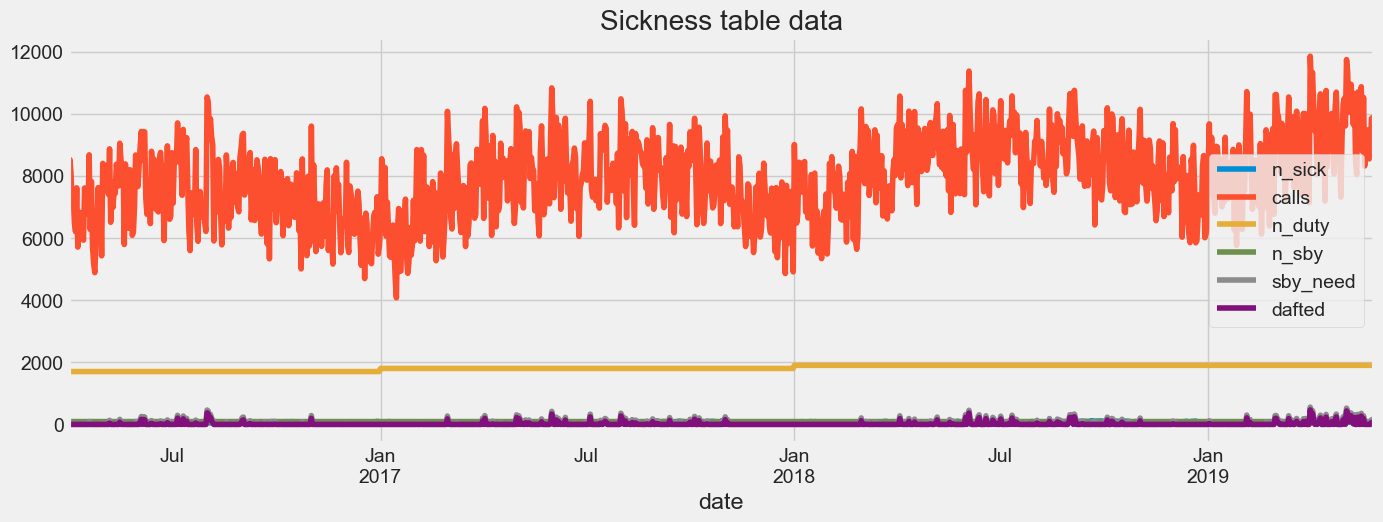

In [228]:
df.plot(style='-',
        figsize=(15, 5),
        color=color_pal,
        title='Sickness table data')
plt.show()

<AxesSubplot: ylabel='Frequency'>

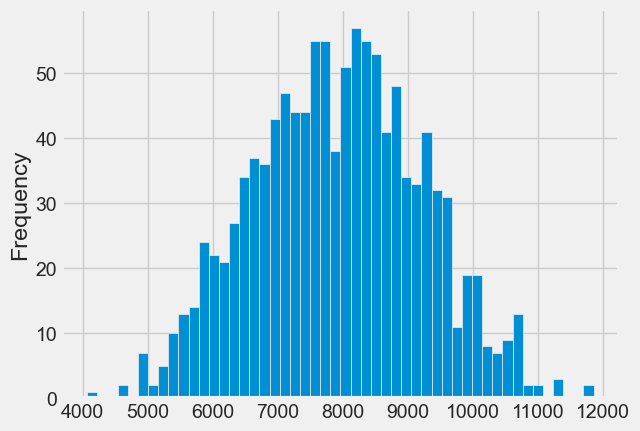

In [229]:
df['calls'].plot(kind='hist', bins=50 )

<AxesSubplot: ylabel='Frequency'>

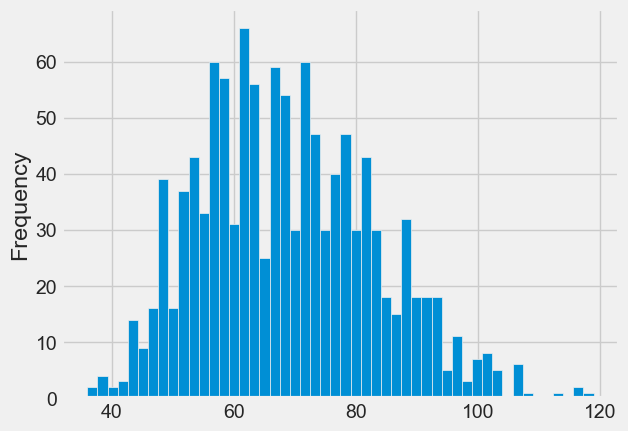

In [230]:
df['n_sick'].plot(kind='hist', bins=50)

<AxesSubplot: ylabel='Frequency'>

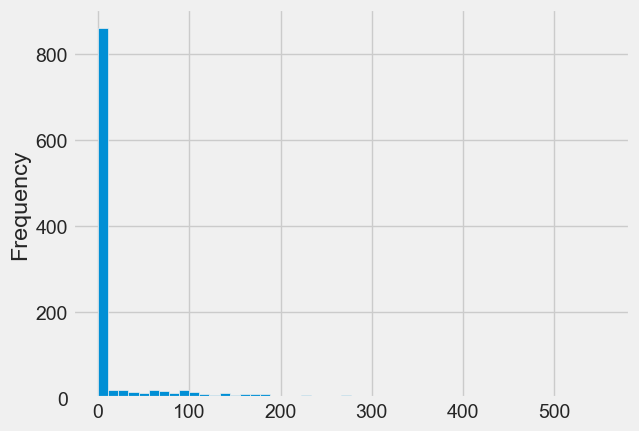

In [231]:
df['sby_need'].plot(kind='hist', bins=50)

In [232]:
df.query('sby_need ==0 ')['sby_need'].count()

849

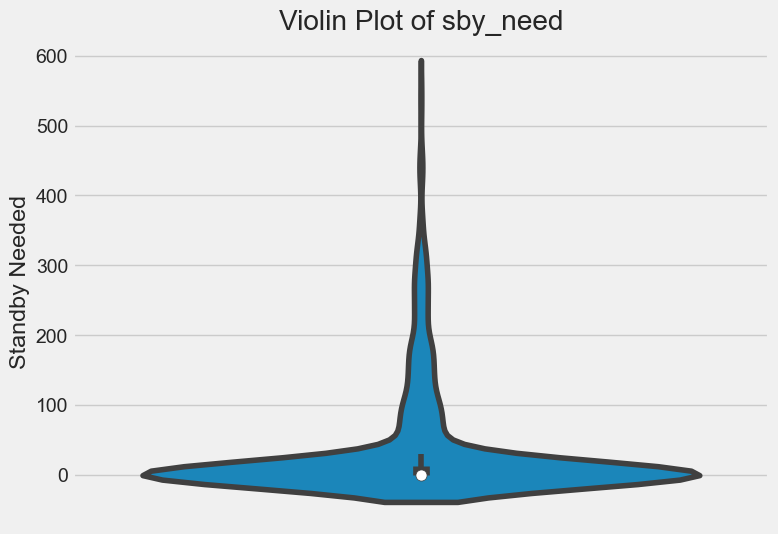

In [233]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.violinplot(data=df, y='sby_need')
plt.title('Violin Plot of sby_need')
plt.ylabel('Standby Needed')
plt.savefig('Violin Plot for Standby Need.png')
plt.show()

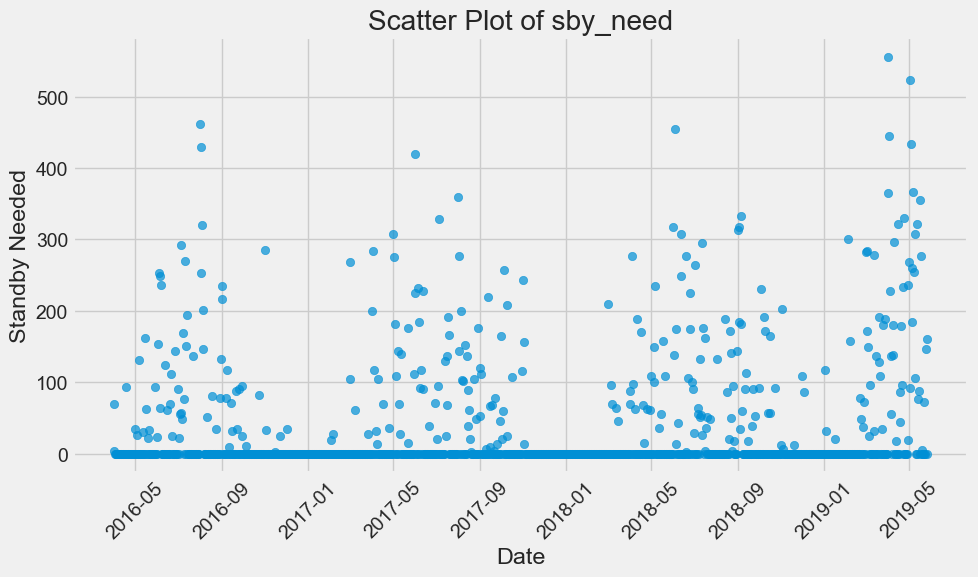

In [234]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['sby_need'], marker='o', alpha=0.7)
plt.title('Scatter Plot of sby_need')
plt.xlabel('Date')
plt.ylabel('Standby Needed')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


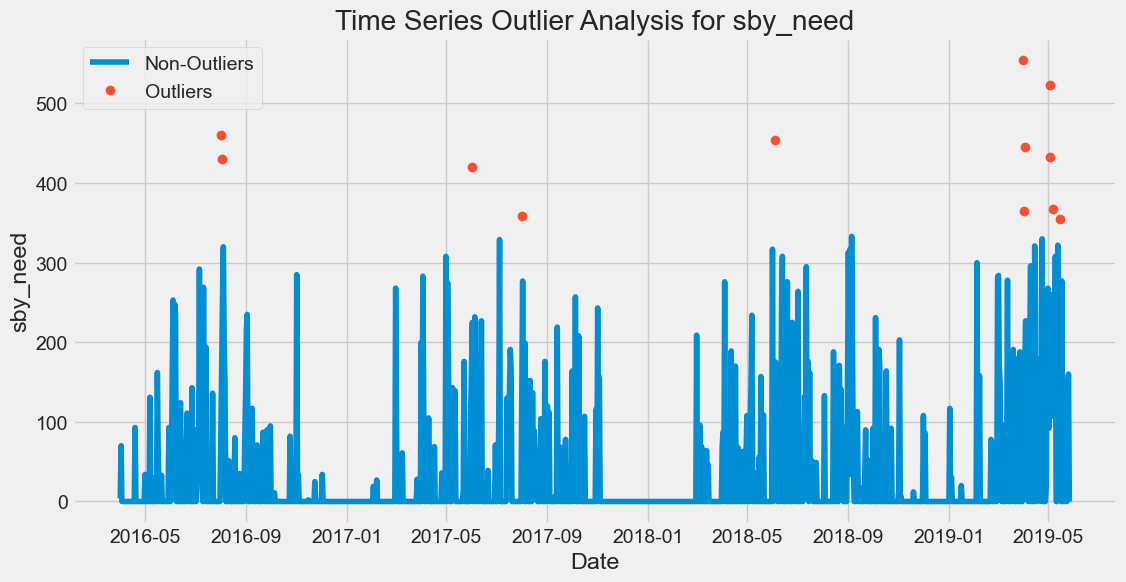

In [235]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your time series data
data = pd.read_csv('sickness_table.csv', parse_dates=['date'], index_col='date')

# Set the outlier threshold
outlier_threshold = 350

# Filter data based on outliers and non-outliers
outliers = data[data['sby_need'] > outlier_threshold]
non_outliers = data[data['sby_need'] <= outlier_threshold]

# Plotting
plt.figure(figsize=(12, 6))

# Plot non-outliers in blue
plt.plot(non_outliers.index, non_outliers['sby_need'], color=color_pal[0], label='Non-Outliers')

# Plot outliers in red
plt.plot(outliers.index, outliers['sby_need'], color=color_pal[1], marker='o', linestyle='None', label='Outliers')

plt.title('Time Series Outlier Analysis for sby_need')
plt.xlabel('Date')
plt.ylabel('sby_need')
plt.legend()
plt.show()


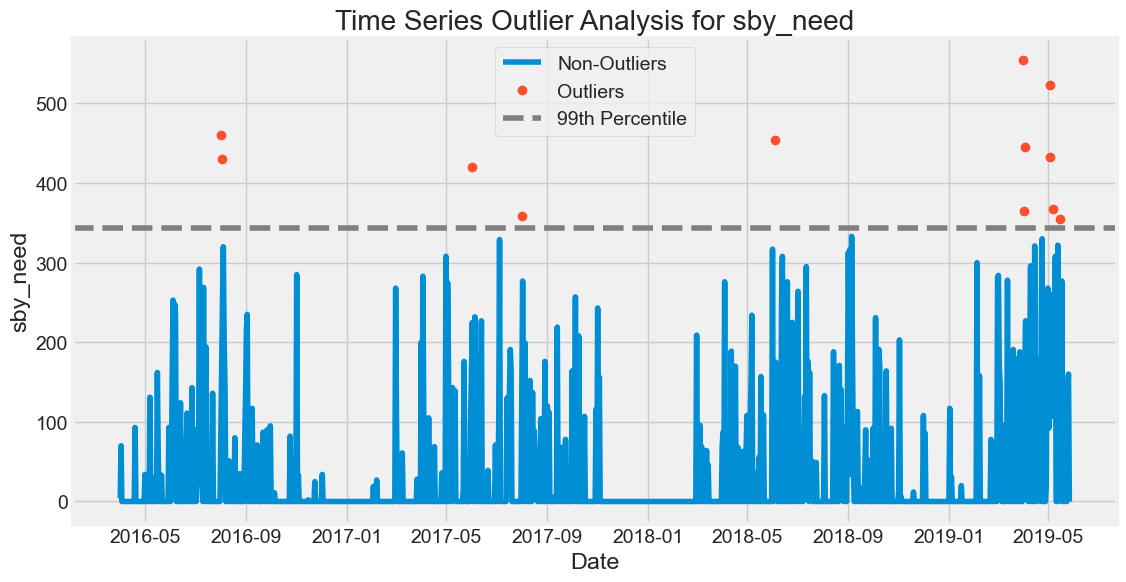

In [236]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your time series data
data = pd.read_csv('sickness_table.csv', parse_dates=['date'], index_col='date')

# Calculate the 95th percentile of sby_need
percentile_95 = data['sby_need'].quantile(0.99)

# Filter data based on the 95th percentile
outliers = data[data['sby_need'] > percentile_95]
non_outliers = data[data['sby_need'] <= percentile_95]

# Plotting
plt.figure(figsize=(12, 6), facecolor='white')

# Plot non-outliers in blue
plt.plot(non_outliers.index, non_outliers['sby_need'], color=color_pal[0], label='Non-Outliers')

# Plot outliers in red
plt.plot(outliers.index, outliers['sby_need'], color=color_pal[1], marker='o', linestyle='None', label='Outliers')

plt.axhline(y=percentile_95, color='gray', linestyle='--', label='99th Percentile')

plt.title('Time Series Outlier Analysis for sby_need')
plt.xlabel('Date')
plt.ylabel('sby_need')
plt.legend()
plt.savefig('Time Series Outlier Analysis for sby_need.png')
plt.show()


<AxesSubplot: title={'center': 'Outliers'}, xlabel='date'>

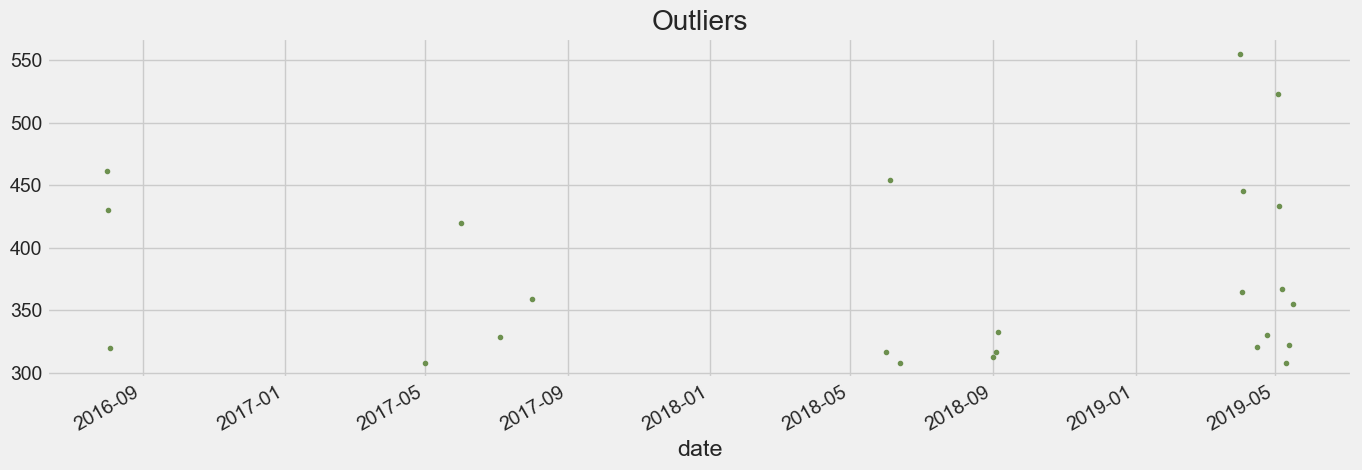

In [237]:
df.query('sby_need > 300')['sby_need'] \
    .plot(style='.',
                                             figsize=(15, 5),
                                             color=color_pal[3],
                                             title='Outliers')

In [238]:
from sklearn.model_selection import TimeSeriesSplit

tss = TimeSeriesSplit(n_splits=4, test_size=100, gap=4)
df = df.sort_index()

            n_sick    calls  n_duty  n_sby  sby_need  dafted
date                                                        
2016-04-01      73   8154.0    1700     90       4.0     0.0
2016-04-02      64   8526.0    1700     90      70.0     0.0
2016-04-03      68   8088.0    1700     90       0.0     0.0
2016-04-04      71   7044.0    1700     90       0.0     0.0
2016-04-05      63   7236.0    1700     90       0.0     0.0
...            ...      ...     ...    ...       ...     ...
2018-04-14      64   8490.0    1900     90       0.0     0.0
2018-04-15      65   7782.0    1900     90       0.0     0.0
2018-04-16      60   8160.0    1900     90       0.0     0.0
2018-04-17      56  10068.0    1900     90     170.0    80.0
2018-04-18      64   8352.0    1900     90       0.0     0.0

[748 rows x 6 columns]
            n_sick   calls  n_duty  n_sby  sby_need  dafted
date                                                       
2016-04-01      73  8154.0    1700     90       4.0     0.0
201

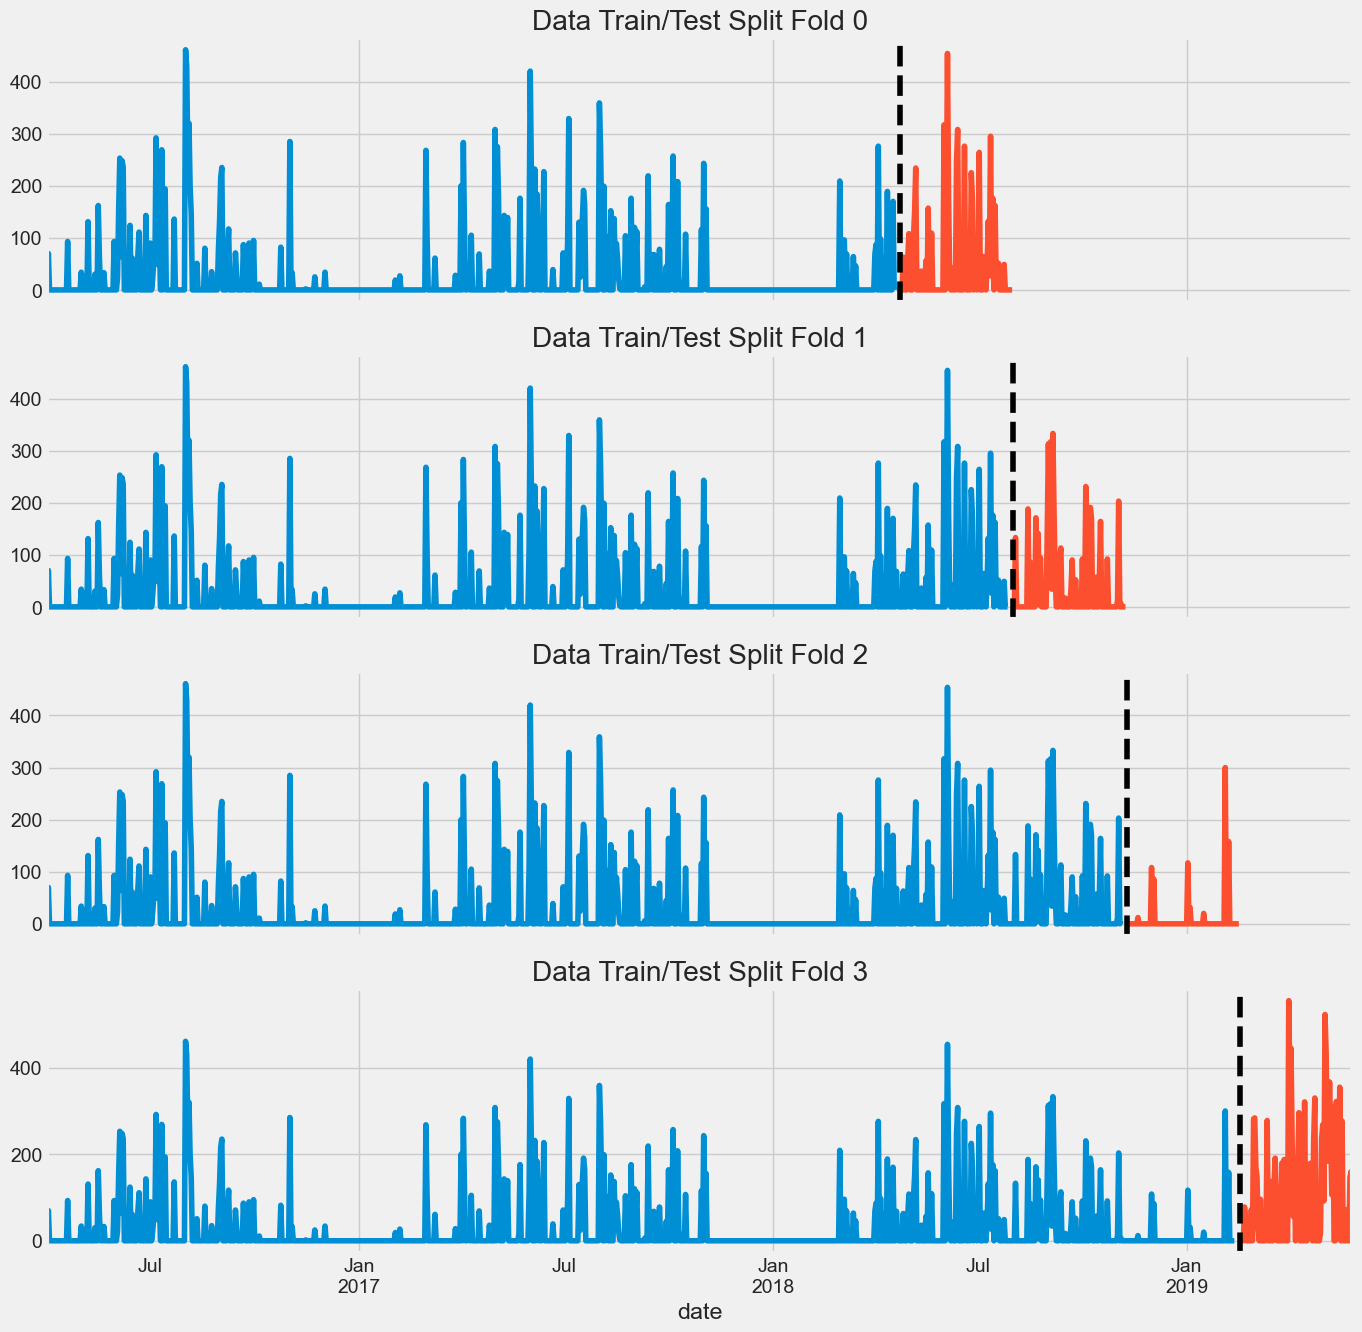

In [239]:
fig, axs = plt.subplots(4, 1, figsize=(15, 15), sharex=True)

fold = 0
for train_idx, val_idx in tss.split(df):
    train = df.iloc[train_idx]
    print(train)
    test = df.iloc[val_idx]
    train['sby_need'].plot(ax=axs[fold],
                          label='Training Set',
                          title=f'Data Train/Test Split Fold {fold}')
    test['sby_need'].plot(ax=axs[fold],
                         label='Test Set')
    axs[fold].axvline(test.index.min(), color='black', ls='--')
    fold += 1
plt.show()

In [240]:
def create_features(dtf) :
    """
    Create time series features from the time index.
    :param dtf: dataframe
    :return:dataframe
    """
    dtf = dtf.copy()
    dtf['dayofweek'] = dtf.index.dayofweek
    dtf['month'] = dtf.index.month
    dtf['year'] = dtf.index.year
    dtf['dayofyear'] = dtf.index.dayofyear
    dtf['dayofmonth'] = dtf.index.day
    dtf['weekofyear'] = dtf.index.isocalendar().week
    dtf['quarter'] = dtf.index.quarter
    return dtf

df = create_features(df)



,n_sick,calls,n_duty,n_sby,sby_need,dafted,dayofweek,month,year,dayofyear,dayofmonth,weekofyear,quarter
date,,,,,,,,,,,,,
2016-04-01,73,8154.0,1700,90,4.0,0.0,4,4,2016,92,1,13,2
2016-04-02,64,8526.0,1700,90,70.0,0.0,5,4,2016,93,2,13,2
2016-04-03,68,8088.0,1700,90,0.0,0.0,6,4,2016,94,3,13,2
2016-04-04,71,7044.0,1700,90,0.0,0.0,0,4,2016,95,4,14,2
2016-04-05,63,7236.0,1700,90,0.0,0.0,1,4,2016,96,5,14,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-23,86,8544.0,1900,90,0.0,0.0,3,5,2019,143,23,21,2
2019-05-24,81,8814.0,1900,90,0.0,0.0,4,5,2019,144,24,21,2
2019-05-25,76,9846.0,1900,90,146.0,56.0,5,5,2019,145,25,21,2


In [241]:
def add_lags(dtf):
    """
    Add lags in the time series
    :param dtf: dataframe
    :return:dataframe
    """
    target_map = dtf['sby_need'].to_dict()
    dtf['lag1'] = (dtf.index - pd.Timedelta('364 days')).map(target_map)
    dtf['lag2'] = (dtf.index - pd.Timedelta('728 days')).map(target_map)
    dtf['lag3'] = (dtf.index - pd.Timedelta('1092 days')).map(target_map)
    return dtf




,n_sick,calls,n_duty,n_sby,sby_need,dafted,dayofweek,month,year,dayofyear,dayofmonth,weekofyear,quarter,lag1,lag2,lag3
date,,,,,,,,,,,,,,,,
2016-04-01,73,8154.0,1700,90,4.0,0.0,4,4,2016,92,1,13,2,NaN,NaN,NaN
2016-04-02,64,8526.0,1700,90,70.0,0.0,5,4,2016,93,2,13,2,NaN,NaN,NaN
2016-04-03,68,8088.0,1700,90,0.0,0.0,6,4,2016,94,3,13,2,NaN,NaN,NaN
2016-04-04,71,7044.0,1700,90,0.0,0.0,0,4,2016,95,4,14,2,NaN,NaN,NaN
2016-04-05,63,7236.0,1700,90,0.0,0.0,1,4,2016,96,5,14,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-23,86,8544.0,1900,90,0.0,0.0,3,5,2019,143,23,21,2,0.0,0.0,0.0
2019-05-24,81,8814.0,1900,90,0.0,0.0,4,5,2019,144,24,21,2,0.0,0.0,0.0
2019-05-25,76,9846.0,1900,90,146.0,56.0,5,5,2019,145,25,21,2,0.0,0.0,0.0


In [242]:
tss = TimeSeriesSplit(n_splits=4, test_size=100, gap=4)
df = df.sort_index()


fold = 0
preds = []
scores = []
for train_idx, val_idx in tss.split(df):
    train = df.iloc[train_idx]
    test = df.iloc[val_idx]

    train = create_features(train)
    test = create_features(test)

    FEATURES = [ 'dayofweek', 'month', 'dayofyear', 'quarter','year', 'lag1', 'lag2','lag3']
    TARGET = ['sby_need']

    X_train = train[FEATURES]
    y_train = train[TARGET]

    X_test = test[FEATURES]
    y_test = test[TARGET]

    reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',
                           n_estimators=1000,
                           early_stopping_rounds=50,
                           objective='reg:linear',
                           max_depth=3,
                           learning_rate=0.01)
    reg.fit(X_train, y_train,
            eval_set=[(X_train, y_train), (X_test, y_test)],
            verbose=100)

    y_pred = reg.predict(X_test)
    preds.append(y_pred)
    score = np.sqrt(mean_squared_error(y_test, y_pred))
    scores.append(score)

[00:29:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:69.64991	validation_1-rmse:104.48388
[100]	validation_0-rmse:61.21715	validation_1-rmse:95.90085
[200]	validation_0-rmse:57.07233	validation_1-rmse:93.92583
[300]	validation_0-rmse:54.20666	validation_1-rmse:91.28150
[400]	validation_0-rmse:51.94723	validation_1-rmse:90.36817
[500]	validation_0-rmse:49.57360	validation_1-rmse:90.22861
[526]	validation_0-rmse:49.13482	validation_1-rmse:90.31042
[00:29:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:74.62026	validation_1-rmse:87.10870
[100]	validation_0-rmse:64.17131	validation_1-rmse:75.95806
[

In [243]:
print(f'Score across folds {np.mean(scores):0.4f}')
print(f'Fold scores:{scores}')

Score across folds 87.2179
Fold scores:[90.16838883639166, 74.32048238900843, 37.3842561531777, 146.9984585624585]


In [244]:
y_pred_df = pd.DataFrame(y_pred)
y_pred_df['predictions'] = y_pred_df[0]
df2=y_pred_df.drop(y_pred_df.columns[0], axis=1)
df2

,predictions
0,1.374158
1,16.138575
2,9.687705
3,12.914518
4,12.829674
...,...
95,33.986290
96,15.548387
97,13.244905
98,1.617803


In [245]:
test_df = pd.DataFrame(y_test)
test_df

,sby_need
date,
2019-02-17,0.0
2019-02-18,0.0
2019-02-19,0.0
2019-02-20,0.0
2019-02-21,78.0
...,...
2019-05-23,0.0
2019-05-24,0.0
2019-05-25,146.0


In [246]:
predictions = pd.concat([test_df, df2.set_index(test_df.index)], axis=1)
predictions

,sby_need,predictions
date,,
2019-02-17,0.0,1.374158
2019-02-18,0.0,16.138575
2019-02-19,0.0,9.687705
2019-02-20,0.0,12.914518
2019-02-21,78.0,12.829674
...,...,...
2019-05-23,0.0,33.986290
2019-05-24,0.0,15.548387
2019-05-25,146.0,13.244905


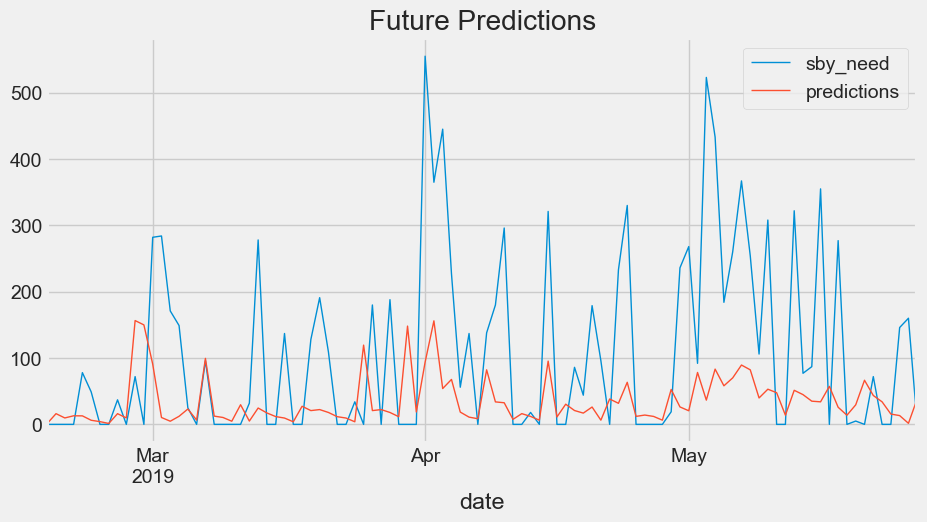

In [247]:
predictions.plot(figsize=(10, 5),
                               color=color_pal,
                               ms=1,
                               lw=1,
                               title='Future Predictions')
plt.show()

In [248]:
# Retrain on all data
df = create_features(df)

FEATURES = ['dayofweek', 'month', 'dayofyear', 'quarter','year', 'lag1', 'lag2','lag3']
TARGET = ['sby_need']


X_all = df[FEATURES]
y_all = df[TARGET]

reg = xgb.XGBRegressor(base_score=0.5,
                       booster='gbtree',
                       n_estimators=500,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
reg.fit(X_all, y_all,
        eval_set=[(X_all, y_all)],
        verbose=100)

[00:29:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:86.43187
[100]	validation_0-rmse:72.14779
[200]	validation_0-rmse:67.53310
[300]	validation_0-rmse:65.10634
[400]	validation_0-rmse:63.46113
[499]	validation_0-rmse:62.24285


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', predictor=None, ...)

In [249]:
df.index.max()

Timestamp('2019-05-27 00:00:00')

In [250]:
# Create future dataframe
future = pd.date_range('2019-03-27','2019-05-27')
future

DatetimeIndex(['2019-03-27', '2019-03-28', '2019-03-29', '2019-03-30',
               '2019-03-31', '2019-04-01', '2019-04-02', '2019-04-03',
               '2019-04-04', '2019-04-05', '2019-04-06', '2019-04-07',
               '2019-04-08', '2019-04-09', '2019-04-10', '2019-04-11',
               '2019-04-12', '2019-04-13', '2019-04-14', '2019-04-15',
               '2019-04-16', '2019-04-17', '2019-04-18', '2019-04-19',
               '2019-04-20', '2019-04-21', '2019-04-22', '2019-04-23',
               '2019-04-24', '2019-04-25', '2019-04-26', '2019-04-27',
               '2019-04-28', '2019-04-29', '2019-04-30', '2019-05-01',
               '2019-05-02', '2019-05-03', '2019-05-04', '2019-05-05',
               '2019-05-06', '2019-05-07', '2019-05-08', '2019-05-09',
               '2019-05-10', '2019-05-11', '2019-05-12', '2019-05-13',
               '2019-05-14', '2019-05-15', '2019-05-16', '2019-05-17',
               '2019-05-18', '2019-05-19', '2019-05-20', '2019-05-21',
      

In [251]:

future_df = pd.DataFrame(index=future)
future_df['isFuture'] = True
df['isFuture'] = False
df_and_future = pd.concat([df, future_df])
df_and_future = create_features(df_and_future)
df_and_future = add_lags(df_and_future)
df_and_future

,n_sick,calls,n_duty,n_sby,sby_need,dafted,dayofweek,month,year,dayofyear,dayofmonth,weekofyear,quarter,lag1,lag2,lag3,isFuture
2016-04-01,73.0,8154.0,1700.0,90.0,4.0,0.0,4,4,2016,92,1,13,2,NaN,NaN,NaN,False
2016-04-02,64.0,8526.0,1700.0,90.0,70.0,0.0,5,4,2016,93,2,13,2,NaN,NaN,NaN,False
2016-04-03,68.0,8088.0,1700.0,90.0,0.0,0.0,6,4,2016,94,3,13,2,NaN,NaN,NaN,False
2016-04-04,71.0,7044.0,1700.0,90.0,0.0,0.0,0,4,2016,95,4,14,2,NaN,NaN,NaN,False
2016-04-05,63.0,7236.0,1700.0,90.0,0.0,0.0,1,4,2016,96,5,14,2,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-23,NaN,NaN,NaN,NaN,NaN,NaN,3,5,2019,143,23,21,2,0.0,0.0,0.0,True
2019-05-24,NaN,NaN,NaN,NaN,NaN,NaN,4,5,2019,144,24,21,2,0.0,0.0,0.0,True
2019-05-25,NaN,NaN,NaN,NaN,NaN,NaN,5,5,2019,145,25,21,2,0.0,0.0,0.0,True
2019-05-26,NaN,NaN,NaN,NaN,NaN,NaN,6,5,2019,146,26,21,2,0.0,0.0,0.0,True


In [252]:
future_w_features = df_and_future.query('isFuture').copy()
future_w_features

,n_sick,calls,n_duty,n_sby,sby_need,dafted,dayofweek,month,year,dayofyear,dayofmonth,weekofyear,quarter,lag1,lag2,lag3,isFuture
2019-03-27,NaN,NaN,NaN,NaN,NaN,NaN,2,3,2019,86,27,13,1,0.0,0.0,NaN,True
2019-03-28,NaN,NaN,NaN,NaN,NaN,NaN,3,3,2019,87,28,13,1,0.0,0.0,NaN,True
2019-03-29,NaN,NaN,NaN,NaN,NaN,NaN,4,3,2019,88,29,13,1,0.0,0.0,4.0,True
2019-03-30,NaN,NaN,NaN,NaN,NaN,NaN,5,3,2019,89,30,13,1,0.0,200.0,70.0,True
2019-03-31,NaN,NaN,NaN,NaN,NaN,NaN,6,3,2019,90,31,13,1,69.0,0.0,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-23,NaN,NaN,NaN,NaN,NaN,NaN,3,5,2019,143,23,21,2,0.0,0.0,0.0,True
2019-05-24,NaN,NaN,NaN,NaN,NaN,NaN,4,5,2019,144,24,21,2,0.0,0.0,0.0,True
2019-05-25,NaN,NaN,NaN,NaN,NaN,NaN,5,5,2019,145,25,21,2,0.0,0.0,0.0,True
2019-05-26,NaN,NaN,NaN,NaN,NaN,NaN,6,5,2019,146,26,21,2,0.0,0.0,0.0,True


In [253]:
future_w_features['pred'] = reg.predict(future_w_features[FEATURES])
future_w_features

,n_sick,calls,n_duty,n_sby,sby_need,dafted,dayofweek,month,year,dayofyear,dayofmonth,weekofyear,quarter,lag1,lag2,lag3,isFuture,pred
2019-03-27,NaN,NaN,NaN,NaN,NaN,NaN,2,3,2019,86,27,13,1,0.0,0.0,NaN,True,51.820011
2019-03-28,NaN,NaN,NaN,NaN,NaN,NaN,3,3,2019,87,28,13,1,0.0,0.0,NaN,True,45.799236
2019-03-29,NaN,NaN,NaN,NaN,NaN,NaN,4,3,2019,88,29,13,1,0.0,0.0,4.0,True,84.478165
2019-03-30,NaN,NaN,NaN,NaN,NaN,NaN,5,3,2019,89,30,13,1,0.0,200.0,70.0,True,69.970474
2019-03-31,NaN,NaN,NaN,NaN,NaN,NaN,6,3,2019,90,31,13,1,69.0,0.0,0.0,True,65.562126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-23,NaN,NaN,NaN,NaN,NaN,NaN,3,5,2019,143,23,21,2,0.0,0.0,0.0,True,66.824821
2019-05-24,NaN,NaN,NaN,NaN,NaN,NaN,4,5,2019,144,24,21,2,0.0,0.0,0.0,True,60.388031
2019-05-25,NaN,NaN,NaN,NaN,NaN,NaN,5,5,2019,145,25,21,2,0.0,0.0,0.0,True,86.847832
2019-05-26,NaN,NaN,NaN,NaN,NaN,NaN,6,5,2019,146,26,21,2,0.0,0.0,0.0,True,73.820526


In [254]:
original_values =df['sby_need'].loc[df.index  >= '2019-03-27']
original_values = pd.DataFrame(original_values)
original_values

,sby_need
date,
2019-03-27,0.0
2019-03-28,188.0
2019-03-29,0.0
2019-03-30,0.0
2019-03-31,0.0
...,...
2019-05-23,0.0
2019-05-24,0.0
2019-05-25,146.0


In [255]:
future_w_features['pred']

2019-03-27    51.820011
2019-03-28    45.799236
2019-03-29    84.478165
2019-03-30    69.970474
2019-03-31    65.562126
                ...    
2019-05-23    66.824821
2019-05-24    60.388031
2019-05-25    86.847832
2019-05-26    73.820526
2019-05-27    48.226608
Name: pred, Length: 62, dtype: float32

In [256]:
df3 = pd.concat([future_w_features['pred'], original_values.set_index(original_values.index)], axis=1)
df3

,pred,sby_need
2019-03-27,51.820011,0.0
2019-03-28,45.799236,188.0
2019-03-29,84.478165,0.0
2019-03-30,69.970474,0.0
2019-03-31,65.562126,0.0
...,...,...
2019-05-23,66.824821,0.0
2019-05-24,60.388031,0.0
2019-05-25,86.847832,146.0
2019-05-26,73.820526,160.0


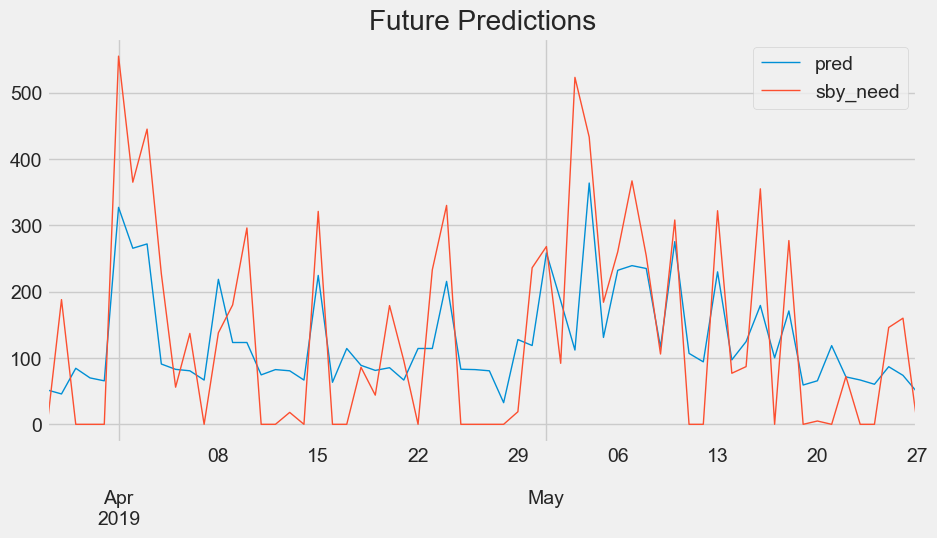

In [257]:
df3.plot(figsize=(10, 5),
                               color=color_pal,
                               ms=1,
                               lw=1,
                               title='Future Predictions')
plt.show()